In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import ExtraTreesRegressor
from utils import utils_gn, utils_sevsn, utils_noah, utils_models
import importlib
importlib.reload(utils_gn)
importlib.reload(utils_sevsn)
importlib.reload(utils_noah)
importlib.reload(utils_models)
warnings.filterwarnings('ignore')

In [3]:
# read the data
df_raw = (utils_gn.read_data('severson_all.pkl')).drop('cycle_life', axis=1).join(utils_gn.read_data('noah_all.pkl'))
df = df_raw.copy()
df.head()

,mean_Q_100_10,log_mean_Q_100_10,var_Q_100_10,log_var_Q_100_10,min_Q_100_10,log_min_Q_100_10,skew_Q_100_10,log_skew_Q_100_10,kurt_Q_100_10,log_kurt_Q_100_10,...,dVdQpeak_maxmag_di_y_100m0,dVdQpeak_maxmag_di_y_diff,dVdQpeak_maxarea_di_y_0,dVdQpeak_maxarea_di_y_50,dVdQpeak_maxarea_di_y_100,dVdQpeak_maxarea_di_y_100m0,dVdQpeak_maxarea_di_y_diff,dSOHdCycCyc1,dSOHdCycCyc100,cycle_life
b1c0,-0.002873,-2.541602,0.000010,-5.014861,-0.008460,-2.072648,-0.532058,-0.274041,1.651688,0.217928,...,-0.005402,0.003024,-79.299389,-75.009448,-67.092799,12.206590,3.626709,0.000388,-0.000031,1851.0
b1c1,-0.004100,-2.387257,0.000010,-5.013960,-0.011004,-1.958457,-0.429375,-0.367163,1.970884,0.294661,...,0.001894,0.000708,-75.511329,-73.411862,-63.284437,12.226892,8.027959,0.000396,-0.000019,2159.0
b1c2,-0.004487,-2.348070,0.000018,-4.737000,-0.017216,-1.764058,-1.080194,0.033502,3.348637,0.524868,...,-0.003083,0.006358,-76.601709,-73.345940,-65.473419,11.128290,4.616753,0.000312,-0.000013,2236.0
b1c3,-0.007456,-2.127507,0.000036,-4.442613,-0.018961,-1.722149,-0.439050,-0.357486,1.904584,0.279800,...,-0.000753,0.013632,-80.446334,-67.731448,-54.750980,25.695354,0.265582,0.000353,-0.000013,1433.0
b1c4,-0.005750,-2.240332,0.000023,-4.647744,-0.013958,-1.855177,-0.362548,-0.440634,1.666169,0.221719,...,0.002110,0.000972,-75.575598,-65.232594,-55.380306,20.195292,-0.490716,0.000347,-0.000030,1708.0


In [4]:
df.index

Index(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9',
       'b1c11',
       ...
       'b3c33', 'b3c34', 'b3c35', 'b3c36', 'b3c40', 'b3c41', 'b3c42', 'b3c43',
       'b3c44', 'b3c45'],
      dtype='object', length=124)

In [5]:
df.columns

Index(['mean_Q_100_10', 'log_mean_Q_100_10', 'var_Q_100_10',
       'log_var_Q_100_10', 'min_Q_100_10', 'log_min_Q_100_10', 'skew_Q_100_10',
       'log_skew_Q_100_10', 'kurt_Q_100_10', 'log_kurt_Q_100_10',
       ...
       'dVdQpeak_maxmag_di_y_100m0', 'dVdQpeak_maxmag_di_y_diff',
       'dVdQpeak_maxarea_di_y_0', 'dVdQpeak_maxarea_di_y_50',
       'dVdQpeak_maxarea_di_y_100', 'dVdQpeak_maxarea_di_y_100m0',
       'dVdQpeak_maxarea_di_y_diff', 'dSOHdCycCyc1', 'dSOHdCycCyc100',
       'cycle_life'],
      dtype='object', length=245)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, b1c0 to b3c45
Columns: 245 entries, mean_Q_100_10 to cycle_life
dtypes: float64(245)
memory usage: 242.4+ KB


In [7]:
df.describe()

,mean_Q_100_10,log_mean_Q_100_10,var_Q_100_10,log_var_Q_100_10,min_Q_100_10,log_min_Q_100_10,skew_Q_100_10,log_skew_Q_100_10,kurt_Q_100_10,log_kurt_Q_100_10,...,dVdQpeak_maxmag_di_y_100m0,dVdQpeak_maxmag_di_y_diff,dVdQpeak_maxarea_di_y_0,dVdQpeak_maxarea_di_y_50,dVdQpeak_maxarea_di_y_100,dVdQpeak_maxarea_di_y_100m0,dVdQpeak_maxarea_di_y_diff,dSOHdCycCyc1,dSOHdCycCyc100,cycle_life
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,...,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,-0.018901,-1.795793,0.000223,-3.835354,-0.040760,-1.440500,-0.103301,-0.777828,1.857125,0.261912,...,-0.001076,0.006009,-86.421878,-61.174991,-46.732521,40.020633,-11.299493,0.000265,-0.000069,807.241935
std,0.011347,0.270904,0.000262,0.411134,0.020373,0.217995,0.330102,0.425974,0.454478,0.067593,...,0.046340,0.046048,11.467643,12.863652,6.009183,10.017040,20.110534,0.000136,0.000137,364.359118
min,-0.077684,-3.105396,0.000010,-5.014861,-0.138026,-2.251053,-1.080194,-2.337813,1.612805,0.207582,...,-0.040512,-0.049829,-112.994264,-88.677648,-69.082990,0.491715,-84.612442,-0.000126,-0.001108,170.000000
25%,-0.024233,-1.950487,0.000077,-4.114970,-0.052091,-1.573442,-0.285918,-0.976312,1.710361,0.233088,...,-0.008373,-0.002406,-92.562247,-71.707141,-48.490348,36.962135,-26.034615,0.000190,-0.000065,525.750000
50%,-0.017671,-1.752752,0.000168,-3.775169,-0.038753,-1.411715,-0.141639,-0.713148,1.761561,0.245898,...,-0.005440,0.000974,-86.660594,-59.687399,-45.281185,41.260141,-6.184834,0.000246,-0.000038,743.000000
75%,-0.011208,-1.615590,0.000298,-3.526121,-0.026703,-1.283235,-0.001193,-0.472983,1.866319,0.270984,...,-0.002228,0.005188,-82.555981,-50.581414,-42.951827,46.879305,4.543194,0.000336,-0.000025,945.500000
max,0.000785,-1.109668,0.001875,-2.726901,-0.005610,-0.860038,1.986572,0.298104,5.920243,0.772340,...,0.491715,0.491715,0.491715,-21.537204,-35.616237,61.973190,23.766408,0.000990,0.000211,2236.000000


In [8]:
# prune cells with more than 1250 cycle life
df = df[df['cycle_life'] <= 1250]
df.index

Index(['b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16',
       'b1c17', 'b1c18',
       ...
       'b3c29', 'b3c30', 'b3c31', 'b3c34', 'b3c35', 'b3c36', 'b3c40', 'b3c41',
       'b3c43', 'b3c44'],
      dtype='object', length=113)

In [9]:
# define paramters to use
test_size= 0.2
params= {"n_estimators": 500,
        "max_depth": 4,
        "min_samples_split": 5,
        "criterion": "squared_error"}

### Extratrees regression without scaling and feature selection

Tree-based regression has started...
Tree-based regression has ended after 0.75 seconds
------------------
Model metrics:
------------------
{'MAE': 55.087417211793586,
 'MAPE': 0.08127216561664924,
 'MSE': 4741.184778935678,
 'R2 score': 0.9133619882426137,
 'RMSE': 68.85626172640858}


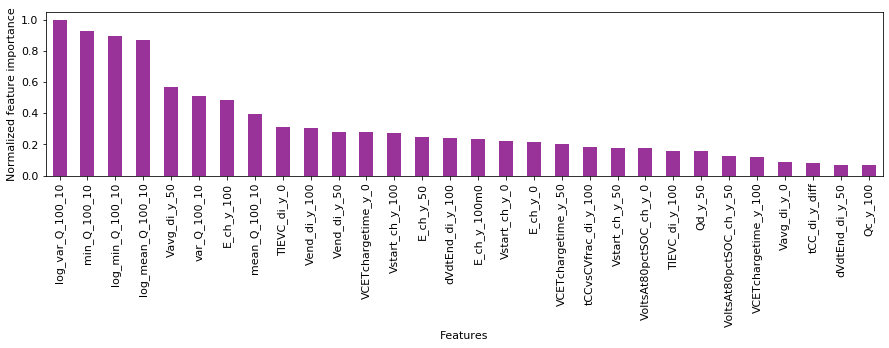

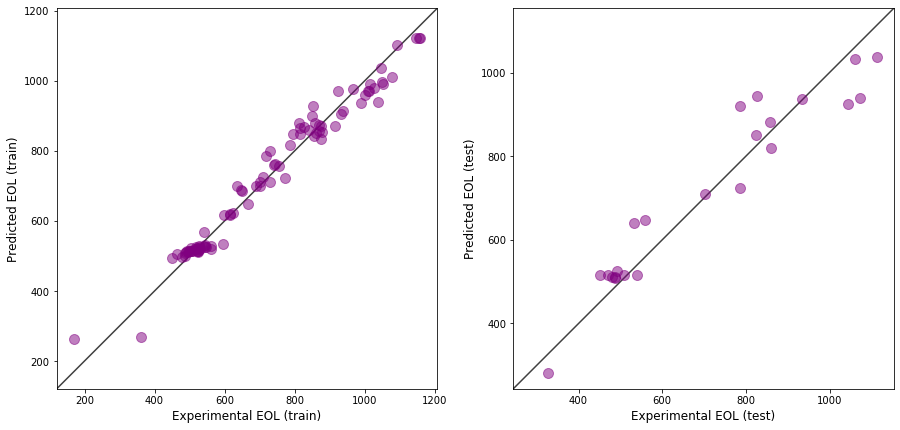

In [9]:
model, metrics = utils_models.fit_tree_based_regression(df=df,
                                                        test_size=test_size,
                                                        feature_selection=False,
                                                        scaling=False,
                                                        params=params,
                                                        plot=True,
                                                        fname='extratrees_model',
                                                        model_type='ext')

### Extratrees regression with scaling but without feature selection

Tree-based regression has started...
Tree-based regression has ended after 0.83 seconds
------------------
Model metrics:
------------------
{'MAE': 56.77510224177736,
 'MAPE': 0.08375196217655465,
 'MSE': 4908.701654347594,
 'R2 score': 0.9103008696196951,
 'RMSE': 70.06212710407523}


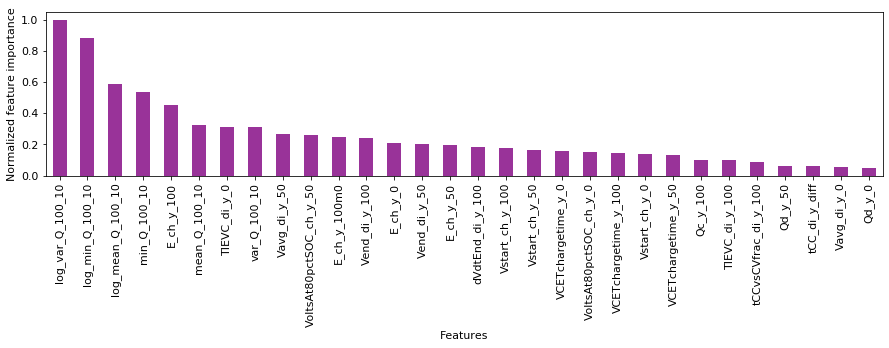

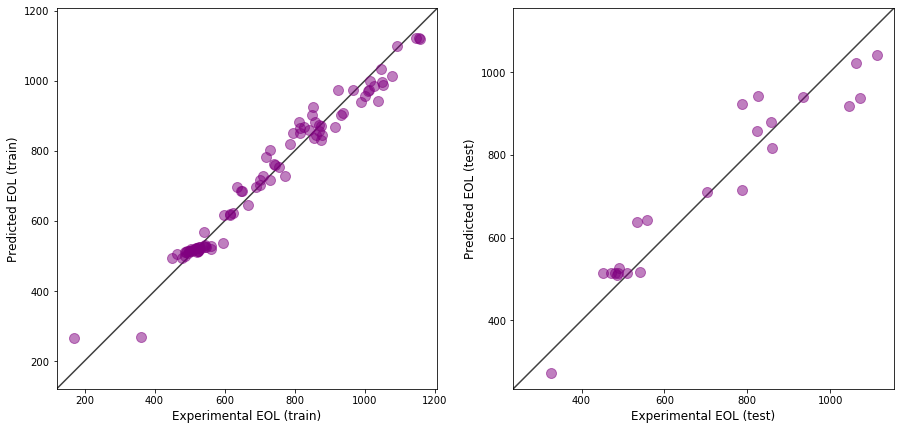

In [10]:
# call Extratrees regression function with scaling and feature selection
model, metrics  = utils_models.fit_tree_based_regression(df=df,
                                                        test_size=test_size,
                                                        feature_selection=False,
                                                        scaling=True,
                                                        params=params,
                                                        plot=True,
                                                        fname='extratrees_model_scaled',
                                                        model_type='ext')

### Extratrees regression with feature selection but without scaling with $k=0.5, 0.6, 0.7, 0.8, 0.9$

In [11]:
# define a list of k
k_list = [0.9, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2]

Fitting model with 90 percent of features...
25 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.85 seconds
------------------
Model metrics:
------------------
{'MAE': 54.66926120424712,
 'MAPE': 0.08091479485865048,
 'MSE': 4618.298533542149,
 'R2 score': 0.915607549314295,
 'RMSE': 67.95806452174862}


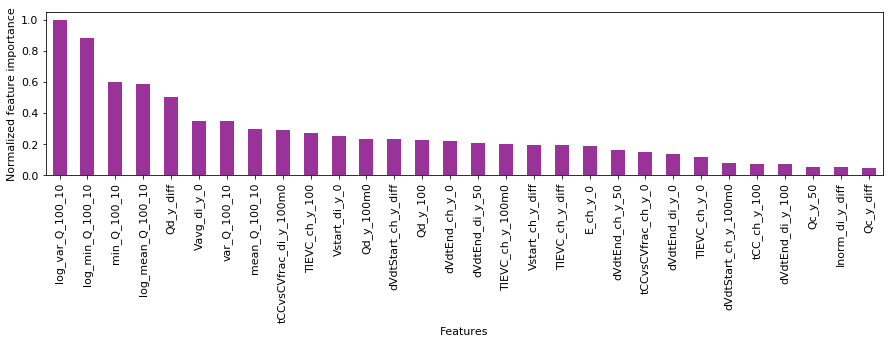

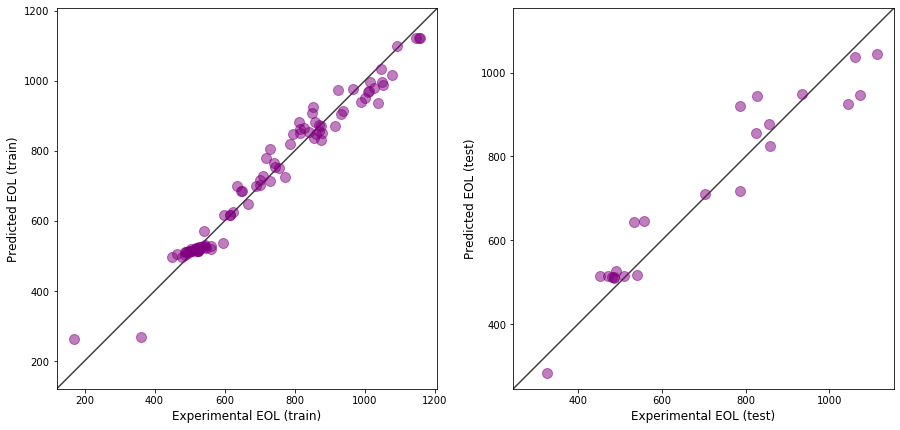

Fitting model with 80 percent of features...
49 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.79 seconds
------------------
Model metrics:
------------------
{'MAE': 54.31835864957659,
 'MAPE': 0.08041479723246606,
 'MSE': 4657.138559963896,
 'R2 score': 0.9148978063233163,
 'RMSE': 68.24323087284112}


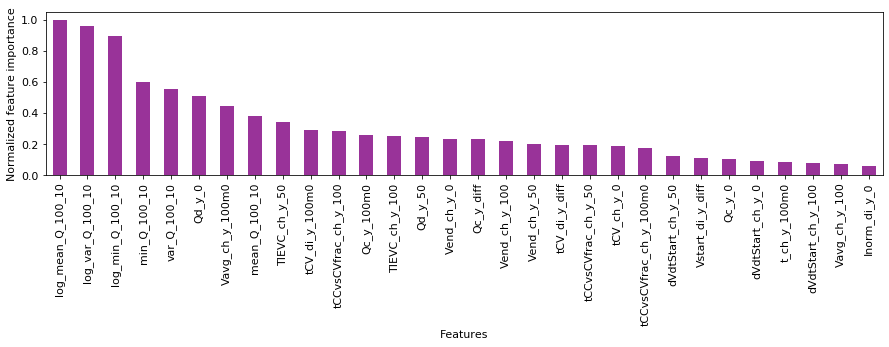

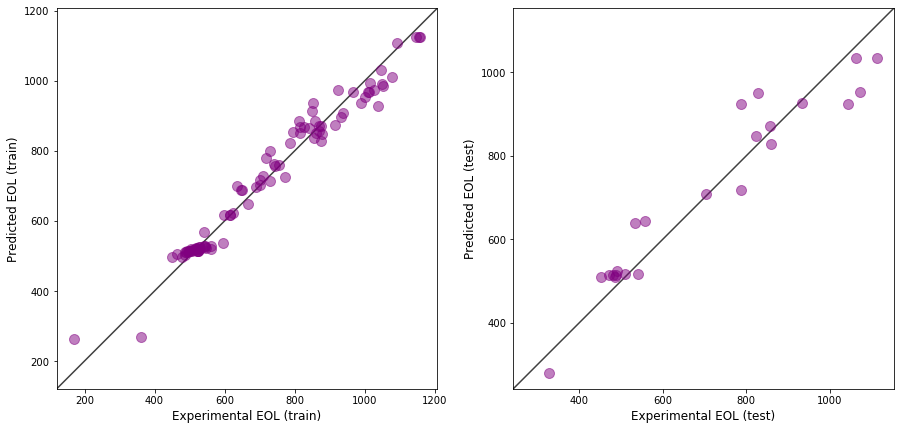

Fitting model with 60 percent of features...
98 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.74 seconds
------------------
Model metrics:
------------------
{'MAE': 53.34172965363837,
 'MAPE': 0.07890476147290762,
 'MSE': 4370.848891996061,
 'R2 score': 0.9201293188620416,
 'RMSE': 66.11239590270543}


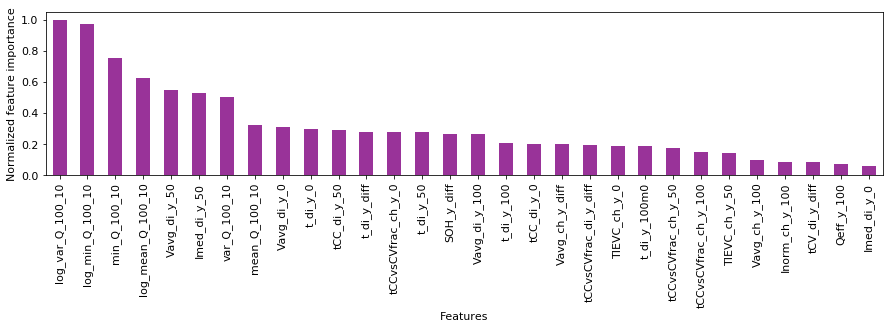

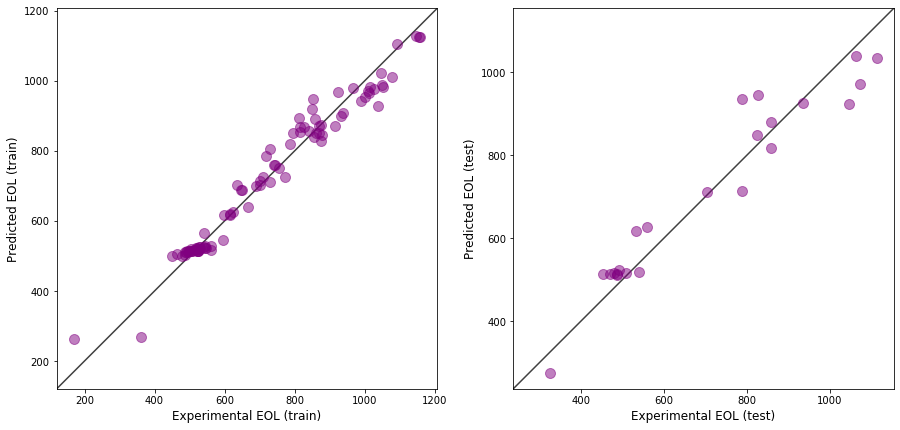

Fitting model with 50 percent of features...
122 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.76 seconds
------------------
Model metrics:
------------------
{'MAE': 51.99745014294609,
 'MAPE': 0.07690089160683045,
 'MSE': 4234.078879810462,
 'R2 score': 0.9226285848633244,
 'RMSE': 65.06980005970867}


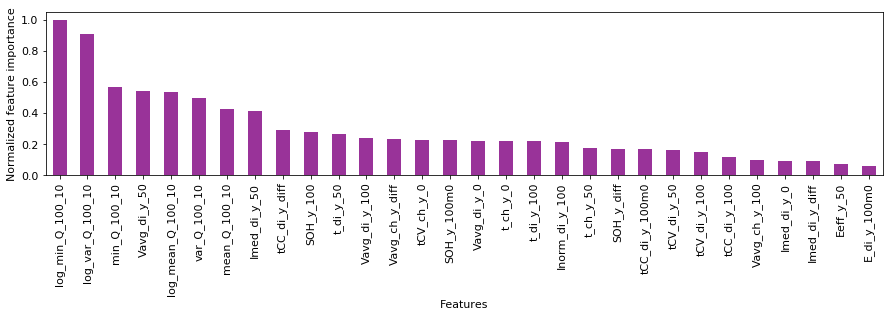

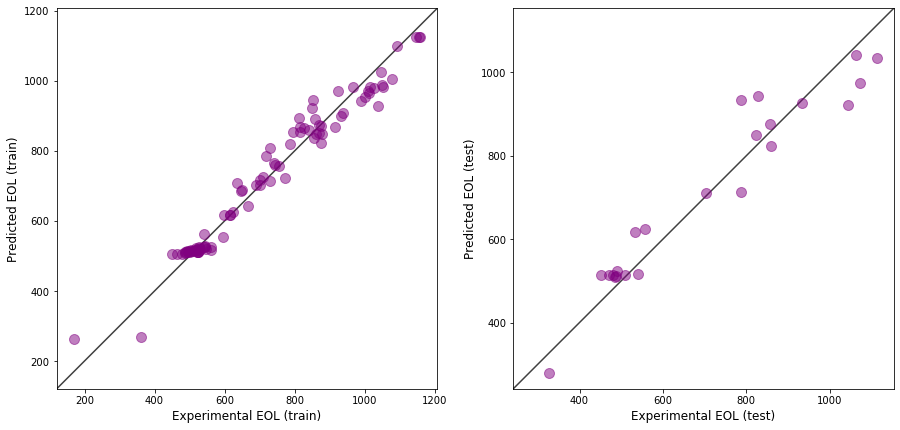

Fitting model with 40 percent of features...
147 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.71 seconds
------------------
Model metrics:
------------------
{'MAE': 50.96770557583419,
 'MAPE': 0.07557306244013193,
 'MSE': 3956.7152273325437,
 'R2 score': 0.9276969879112749,
 'RMSE': 62.90242624360799}


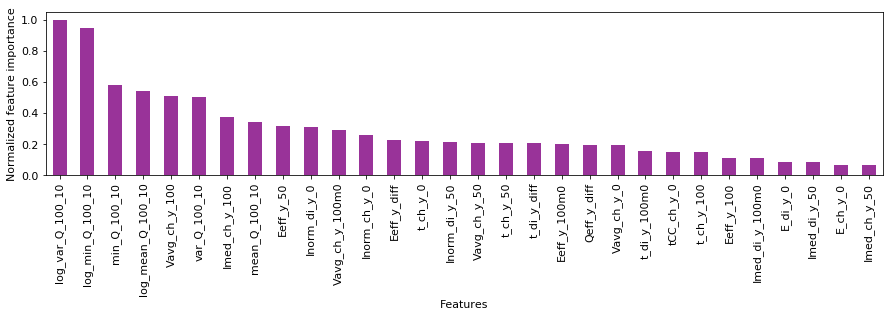

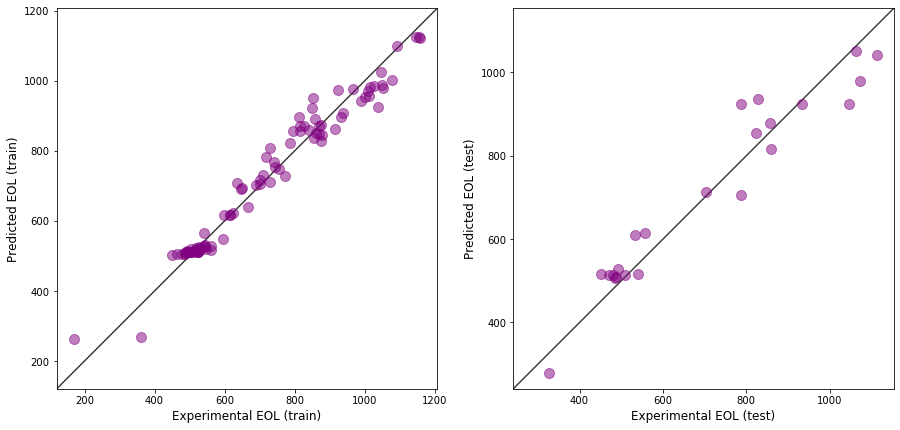

Fitting model with 30 percent of features...
171 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.65 seconds
------------------
Model metrics:
------------------
{'MAE': 50.92200153766178,
 'MAPE': 0.07529156943154534,
 'MSE': 4005.626250464156,
 'R2 score': 0.9268032126220329,
 'RMSE': 63.29001698897035}


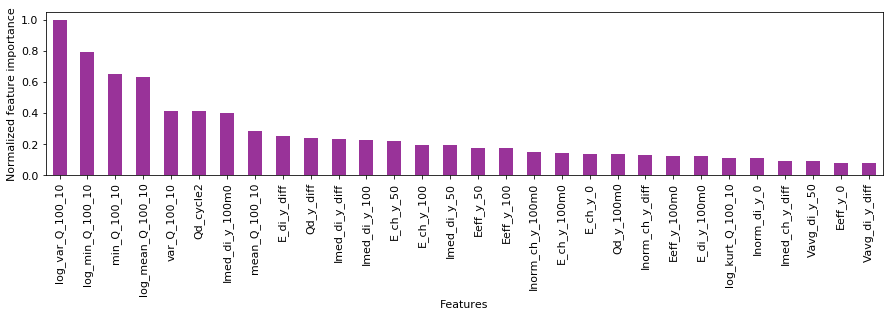

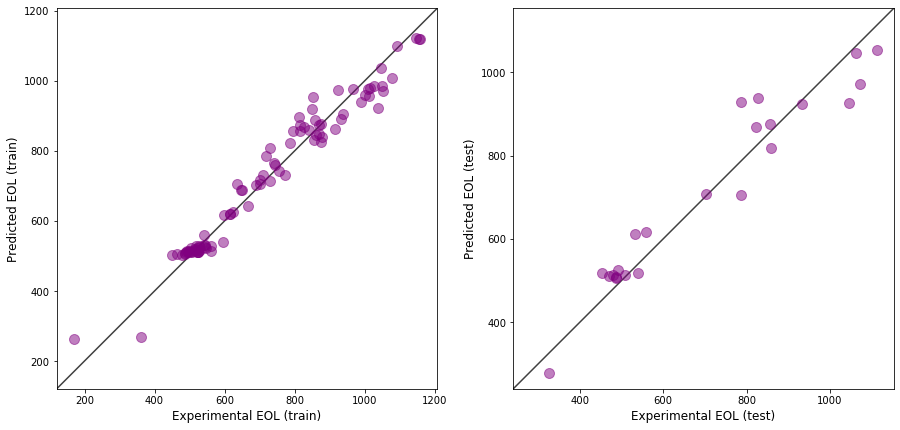

Fitting model with 20 percent of features...
196 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.67 seconds
------------------
Model metrics:
------------------
{'MAE': 52.03104477014085,
 'MAPE': 0.074727599237773,
 'MSE': 4567.844540309708,
 'R2 score': 0.9165295200584643,
 'RMSE': 67.58583091380699}


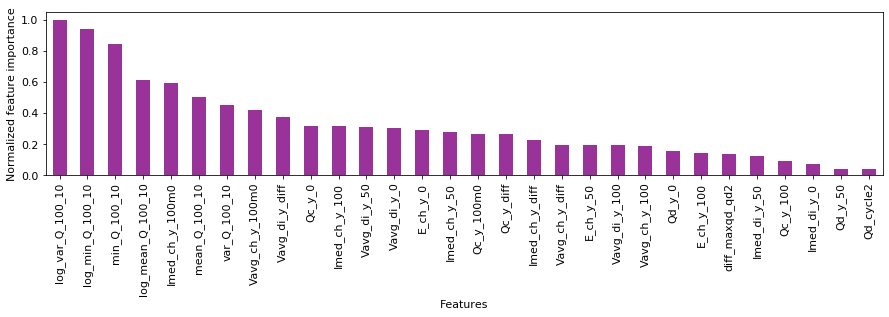

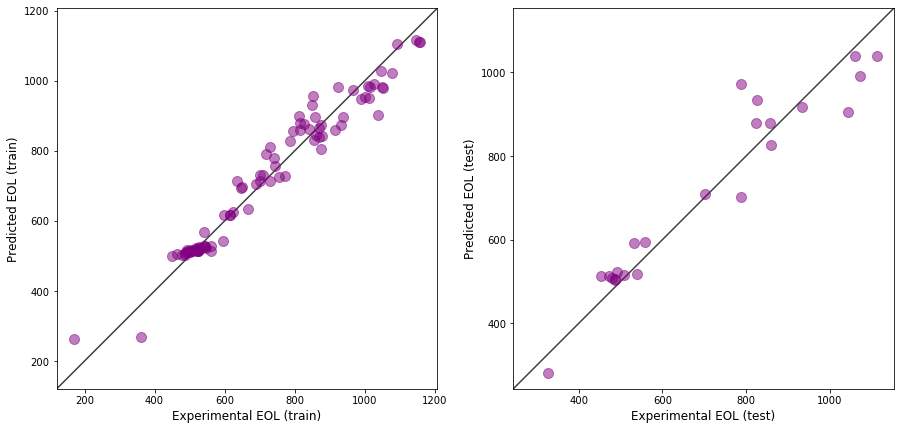

,MAE,MAPE,MSE,RMSE,R2 score
Features used (%),,,,,
90.0,54.669261,0.080915,4618.298534,67.958065,0.915608
80.0,54.318359,0.080415,4657.138560,68.243231,0.914898
60.0,53.341730,0.078905,4370.848892,66.112396,0.920129
50.0,51.997450,0.076901,4234.078880,65.069800,0.922629
40.0,50.967706,0.075573,3956.715227,62.902426,0.927697
30.0,50.922002,0.075292,4005.626250,63.290017,0.926803
20.0,52.031045,0.074728,4567.844540,67.585831,0.916530


In [12]:
# call Extratrees regression function with feature selection using different k
metric_list = []

for k in k_list:
    print('Fitting model with {} percent of features...'.format(int(k*100)))
    model, metrics = utils_models.fit_tree_based_regression(df=df,
                                                            test_size=test_size,
                                                            feature_selection=True,
                                                            scaling=False,
                                                            params=params,
                                                            plot=True,
                                                            fname='extratrees_model_ftselection_k_'+str(int(k*100)),
                                                            model_type='ext',
                                                            k=k)
    metric_list.append(list(metrics.values()))

metric_data = pd.DataFrame(data=np.array(metric_list), columns=metrics.keys(), index=np.array(k_list)*100)
metric_data.index.name = 'Features used (%)'
metric_data

### Extratrees regression with feature selection and scaling with $k=0.5, 0.6, 0.7, 0.8, 0.9$

Fitting model with 90 percent of features...
25 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.94 seconds
------------------
Model metrics:
------------------
{'MAE': 55.61378573284249,
 'MAPE': 0.08192154150423087,
 'MSE': 4784.218132901938,
 'R2 score': 0.9125756185057807,
 'RMSE': 69.16804271411718}


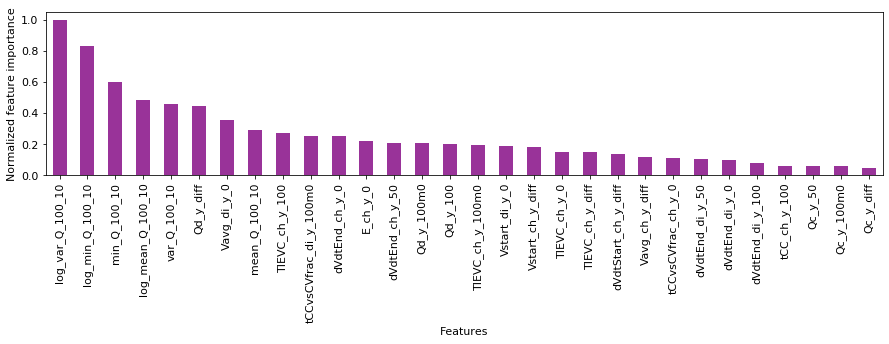

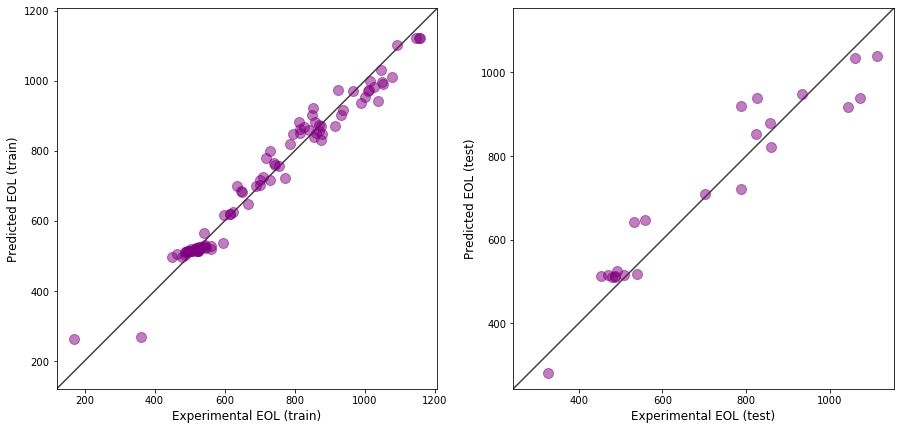

Fitting model with 80 percent of features...
49 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.89 seconds
------------------
Model metrics:
------------------
{'MAE': 54.66158968190706,
 'MAPE': 0.0807745504918758,
 'MSE': 4672.733870027897,
 'R2 score': 0.9146128255179514,
 'RMSE': 68.3573980636178}


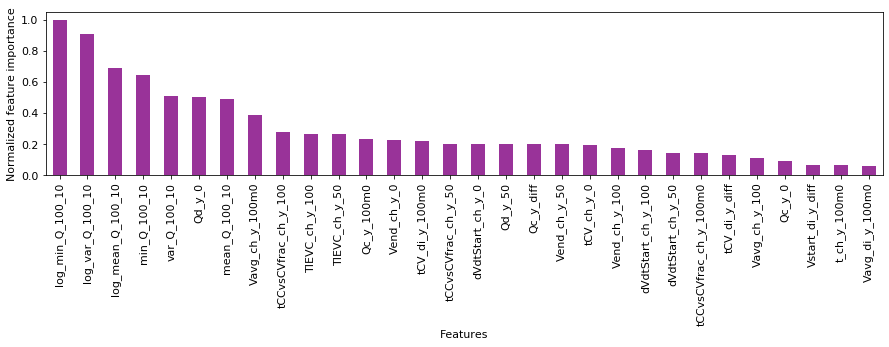

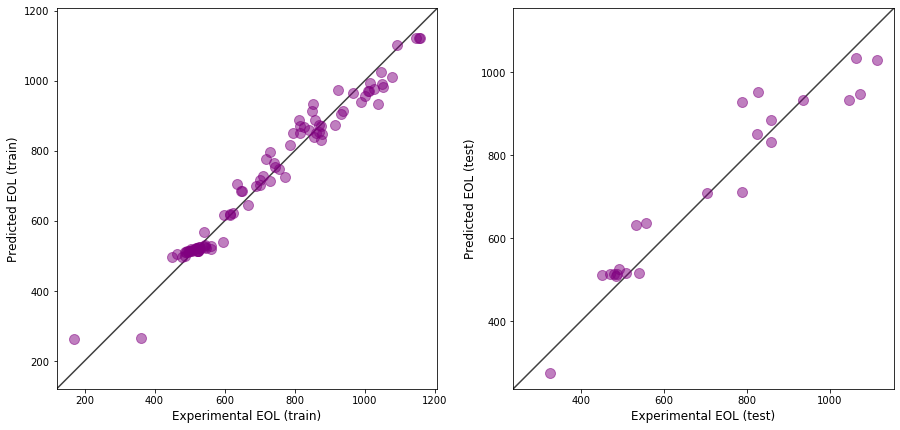

Fitting model with 60 percent of features...
98 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.77 seconds
------------------
Model metrics:
------------------
{'MAE': 53.043020094066335,
 'MAPE': 0.07847759458837285,
 'MSE': 4302.272869253829,
 'R2 score': 0.9213824424042862,
 'RMSE': 65.59171341910371}


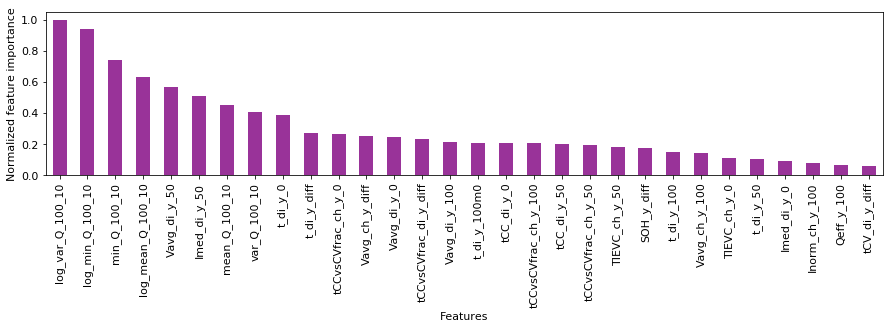

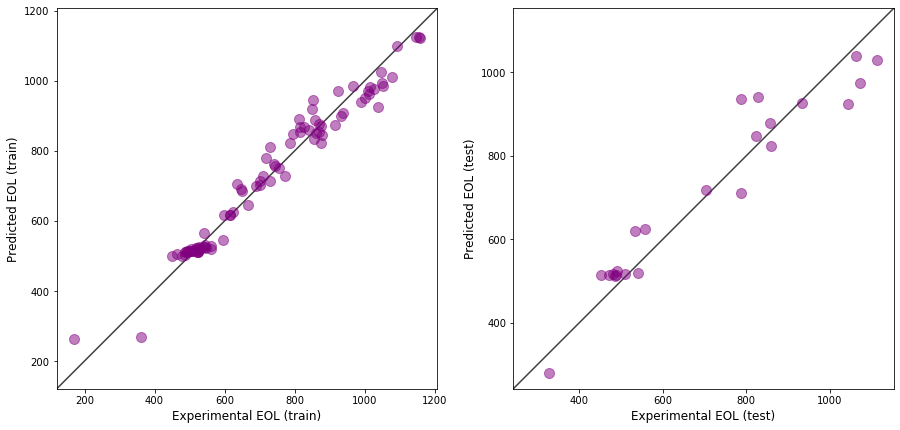

Fitting model with 50 percent of features...
122 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.72 seconds
------------------
Model metrics:
------------------
{'MAE': 52.213110905755556,
 'MAPE': 0.07732863570960234,
 'MSE': 4172.233691107004,
 'R2 score': 0.9237587125499385,
 'RMSE': 64.59283002862628}


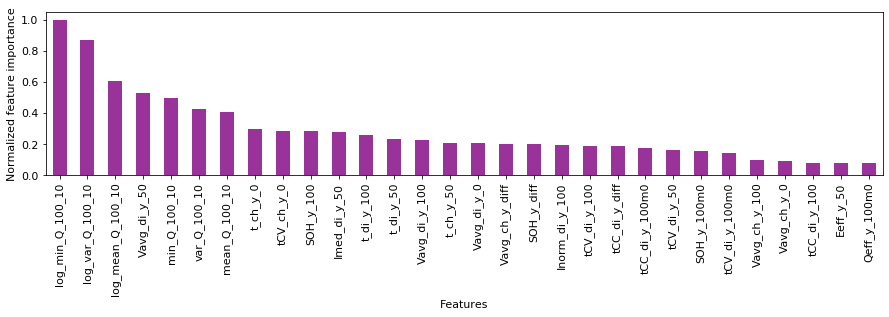

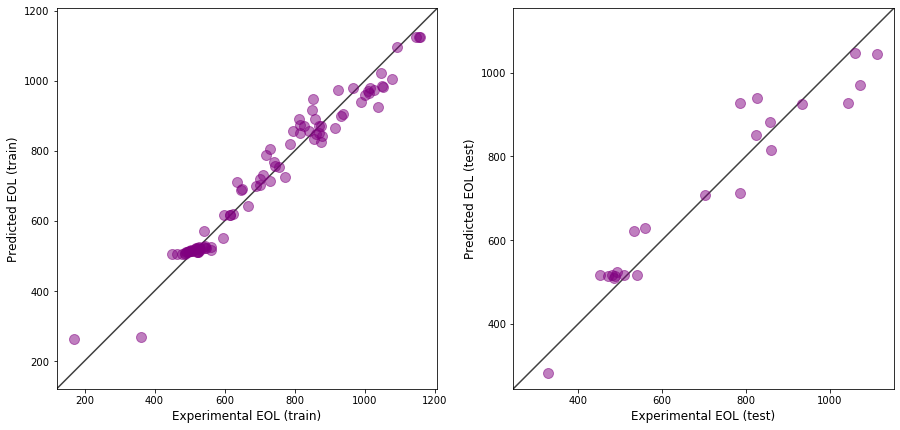

Fitting model with 40 percent of features...
147 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.66 seconds
------------------
Model metrics:
------------------
{'MAE': 51.43960042900353,
 'MAPE': 0.07620621715009933,
 'MSE': 4112.146361351975,
 'R2 score': 0.9248567180115511,
 'RMSE': 64.12601937865765}


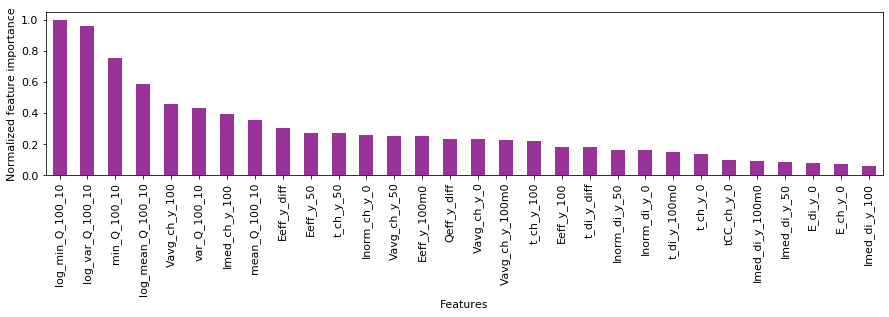

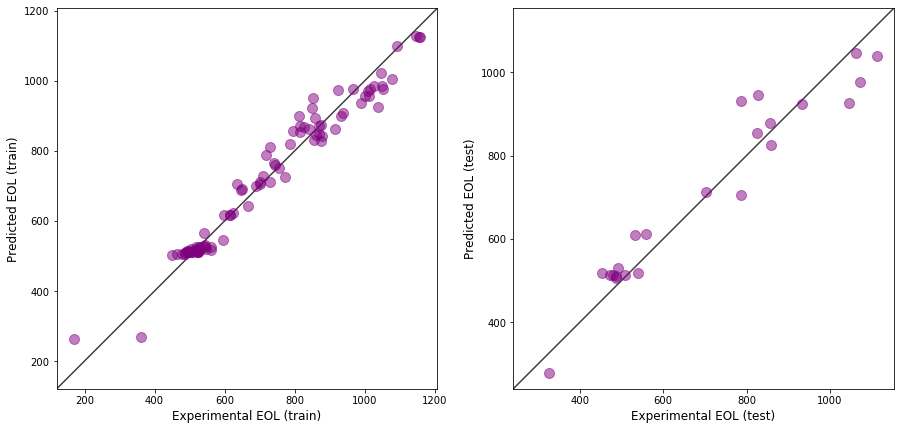

Fitting model with 30 percent of features...
171 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.6 seconds
------------------
Model metrics:
------------------
{'MAE': 50.903380857278336,
 'MAPE': 0.07517665380449362,
 'MSE': 4035.1921887987446,
 'R2 score': 0.9262629396243572,
 'RMSE': 63.52316261647199}


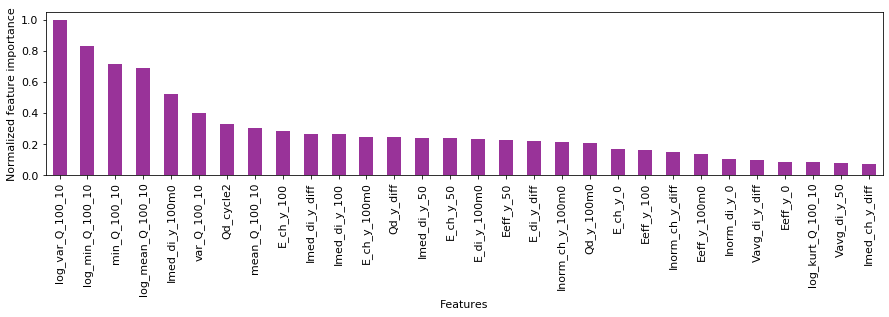

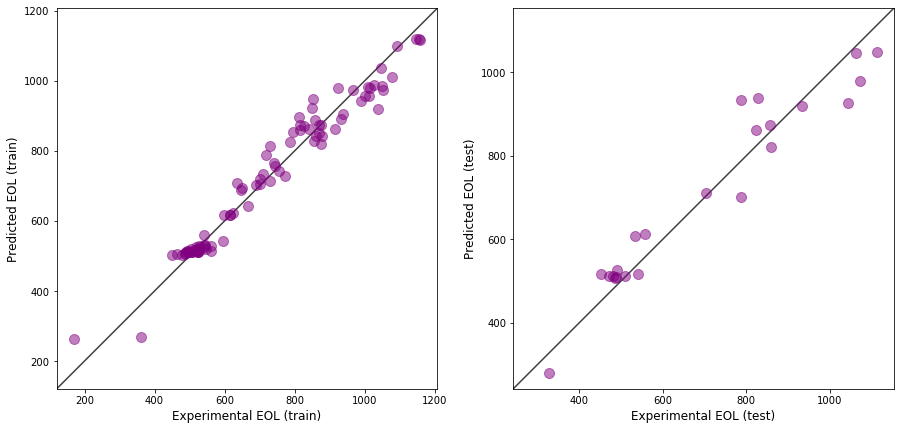

Fitting model with 20 percent of features...
196 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.56 seconds
------------------
Model metrics:
------------------
{'MAE': 52.92220226796177,
 'MAPE': 0.07571336745648477,
 'MSE': 4649.296887682669,
 'R2 score': 0.9150411010749397,
 'RMSE': 68.1857528203852}


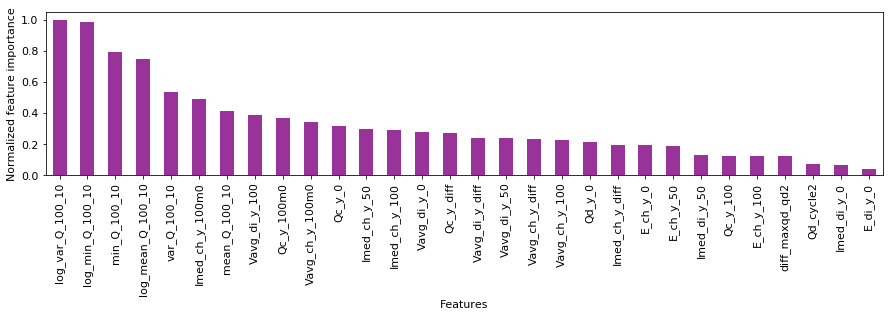

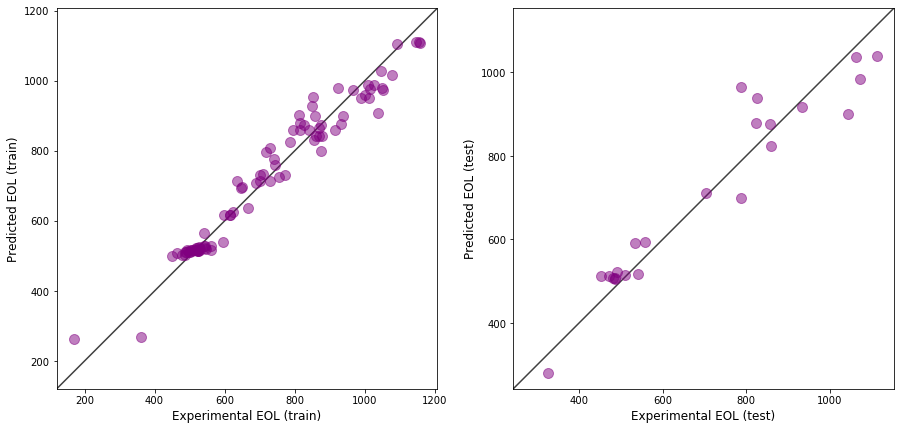

,MAE,MAPE,MSE,RMSE,R2 score
Features used (%),,,,,
90.0,55.613786,0.081922,4784.218133,69.168043,0.912576
80.0,54.661590,0.080775,4672.733870,68.357398,0.914613
60.0,53.043020,0.078478,4302.272869,65.591713,0.921382
50.0,52.213111,0.077329,4172.233691,64.592830,0.923759
40.0,51.439600,0.076206,4112.146361,64.126019,0.924857
30.0,50.903381,0.075177,4035.192189,63.523163,0.926263
20.0,52.922202,0.075713,4649.296888,68.185753,0.915041


In [13]:
# call Extratrees regression function with feature selection and scaling using different k
metric_list = []

for k in k_list:
    print('Fitting model with {} percent of features...'.format(int(k*100)))
    model, metrics = utils_models.fit_tree_based_regression(df=df,
                                                            test_size=test_size,
                                                            feature_selection=True,
                                                            scaling=True,
                                                            params=params,
                                                            plot=True,
                                                            fname='extratrees_model_ftselection_scaled_k_'+str(int(k*100)),
                                                            model_type='ext',
                                                            k=k)
    metric_list.append(list(metrics.values()))

metric_data = pd.DataFrame(data=np.array(metric_list), columns=metrics.keys(), index=np.array(k_list)*100)
metric_data.index.name = 'Features used (%)'
metric_data

### Perform $k$-Fold Repeated Cross-validation on the best model

In [14]:
# the best model here uses less features and excelled in MAPE: feature_selection=True, k=0.2
model = ExtraTreesRegressor(**params)
best_model_cross_val_scores = utils_models.repeated_kfold_cross_validation(model=model,
                                                                           df=df,
                                                                           n_splits=3,
                                                                           n_repeats=3,
                                                                           feature_selection=True,
                                                                           scaling=False,
                                                                           k=0.2)

best_model_cross_val_scores

196 features removed from a total of 244


{'test_MAE': (58.24674386800695, 8.218309899189157),
 'test_MAPE': (0.08982876078828622, 0.02656728275162517),
 'test_MSE': (6237.411726084529, 2054.9102183920395),
 'test_R2 score': (0.868780922144912, 0.036438665372602146)}

### Hyper-parameter tuning

In [10]:
estimator = ExtraTreesRegressor()
param_grid = {"n_estimators": [100, 200, 300, 400, 500, 1000],
                    "max_depth": [2, 3, 4, 5],
                    "min_samples_split": [2, 3, 4, 5]}
scoring = 'neg_mean_absolute_percentage_error'
cv = 3

# for the model without feature selection
utils_models.hyperparameter_tuning(df, estimator, param_grid, scoring, cv, feature_selection=False, k=None)

({'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 200},
 -0.11344345788218567)

In [11]:
# for the model with feature selection
utils_models.hyperparameter_tuning(df, estimator, param_grid, scoring, cv, feature_selection=True, k=0.2)

196 features removed from a total of 244


({'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 200},
 -0.10061854999574349)

### Use the best hyper-parameter to rebuild the models and carry out repeated $k$-fold cross-validation

In [12]:
best_param = {'max_depth': 5,
            'min_samples_split': 3,
            'n_estimators': 200
            }

Tree-based regression has started...
Tree-based regression has ended after 0.4 seconds
------------------
Model metrics:
------------------
{'MAE': 54.09857631199679,
 'MAPE': 0.07944914991002379,
 'MSE': 4434.53958719789,
 'R2 score': 0.9189654673234456,
 'RMSE': 66.59233880258216}


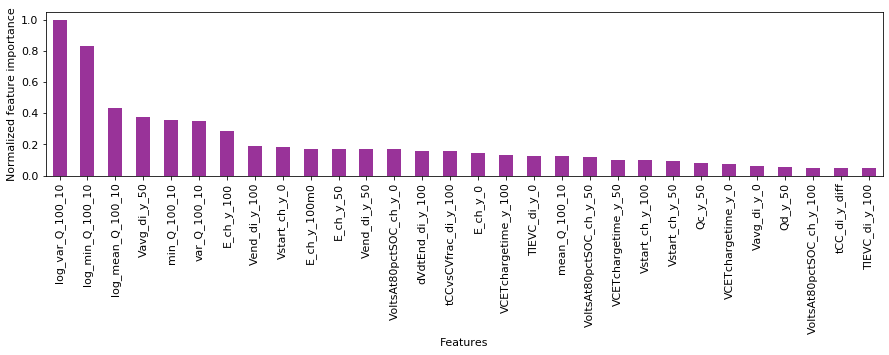

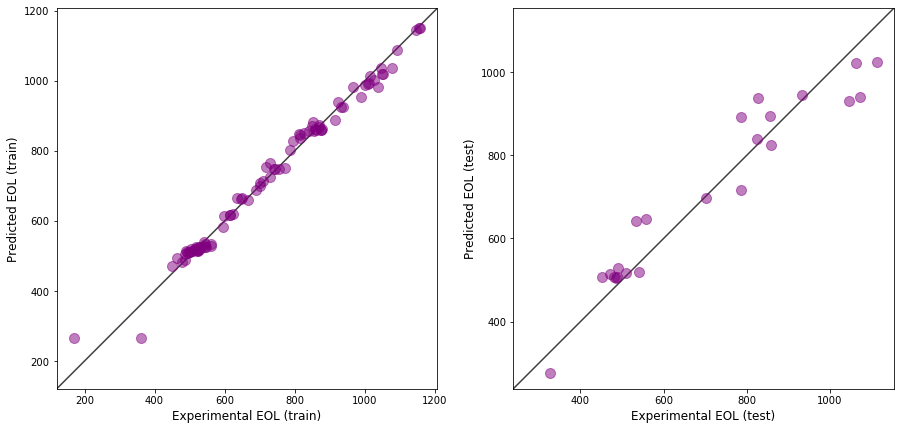

In [13]:
# for the model using all the features 
best_model_all, metrics_all = utils_models.fit_tree_based_regression(df=df,
                                                                    test_size=test_size,
                                                                    feature_selection=False,
                                                                    scaling=False,
                                                                    params=best_param,
                                                                    plot=True,
                                                                    fname='best_all_features_ext_model',
                                                                    model_type='ext')

In [ ]:
# for the model using selected features 
best_model_all, metrics_all = utils_models.fit_tree_based_regression(df=df,
                                                                    test_size=test_size,
                                                                    feature_selection=False,
                                                                    scaling=False,
                                                                    params=best_param,
                                                                    plot=True,
                                                                    fname='best_all_features_ext_model',
                                                                    model_type='ext')